In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [4]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [5]:
graph = graph_builder.compile()

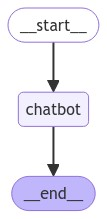

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [7]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

Assistant: Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to assist you with anything you need. How can I help you today?
Assistant: The location of the 2036 Olympics has not been officially announced yet. Typically, the host city for the Olympics is selected through a bidding process by the International Olympic Committee (IOC) several years in advance of the event. It is possible that potential host cities for the 2036 Olympics have already expressed interest, but the final decision has not been made.
Assistant: I'm glad you think so! If there's anything specific you'd like to know or talk about, feel free to ask.
Assistant: Is there anything else I can help with?
Assistant: Can you provide more context or ask a specific question?
Goodbye!
